In [1]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [7]:
file_path = "/home/bharat/proj/time_series1/4200_C005_2019_03_03.tsv"
df = pd.read_csv(file_path, sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

In [4]:
def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
    individual_series = individual_series.reset_index()
    return individual_series


def train_test_split(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i]    
    test = data[-i:]
    return train,test

In [98]:
train,test=  train_test_split(df,500056565,100278,16)
dataframe = n_series(df,500056565, 100278)

In [100]:
kunag,matnr = 500056565,100278
index = str(kunag)+"_"+str(matnr)
index

'500056565_100278'

In [101]:
# order = 16
# test_points = 16
# # df_testing_complete = pd.read_csv(r'testing.csv')
# df_testing_complete = dataframe[-16:]
# test_predictions = []
# print(dataframe[102:])
# for k in range(0, test_points):
#     df = dataframe[:-test_points + k]
#     df_training_complete = df
#     print(df_training_complete.shape)
  
#     df_training_processed = df_training_complete.iloc[:, 1:2].values  

#     scaler = MinMaxScaler(feature_range = (0, 1))
#     df_training_scaled = scaler.fit_transform(df_training_processed)  

#     features_set = []  
#     labels = []  
#     for i in range(order , df.shape[0] - 1):  
#         features_set.append(df_training_scaled[i-order:i, 0])
#         labels.append(df_training_scaled[i, 0])
    
#     print("X", features_set[-1:])
#     features_set, labels = np.array(features_set), np.array(labels)  
#     features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
#     print(features_set.size)
#     model = Sequential()  
#     model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
#     model.add(Dropout(0.2))  
#     model.add(LSTM(units=50, return_sequences=True))  
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=50, return_sequences=True))  
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=50))  
#     model.add(Dropout(0.2))
#     model.add(Dense(units = 1))  
#     model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
    
#     model.fit(features_set, labels, epochs = 5, batch_size = 32)  
#     df_testing_processed = df_testing_complete.iloc[k:k+1, 1:2].values 
#     df_total = pd.concat((df_training_complete['quantity'], df_testing_complete['quantity']), axis=0)  
#     test_inputs = df_total[len(df_total) - len(df_testing_complete) - order + k:].values  
#     test_inputs = test_inputs.reshape(-1,1)  
#     test_inputs = scaler.transform(test_inputs) 

#     test_features = []   
#     test_features.append(test_inputs[1:order+1, 0])
    
#     test_features = np.array(test_features)  
#     test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
#     print("Y", test_features[-1][-1][-1])
#     predictions = model.predict(test_features)  
#     predictions = scaler.inverse_transform(predictions)  
#     test_predictions.append(predictions)
# test_predictions_1 = [i[0][0] for i in test_predictions]
# test_predictions_1

In [11]:
# main_df = pd.DataFrame(columns =["kunag","matnr","111","022"])




def lstm(df,kunag,matnr):
    train,test=  train_test_split(df,kunag,matnr,16)
    dataframe = n_series(df,kunag,matnr)
    index = str(kunag)+"_"+str(matnr)
    order = 16
    test_points = 16
    # df_testing_complete = pd.read_csv(r'testing.csv')
    df_testing_complete = dataframe[-16:]
    test_predictions = []
    # print(dataframe[-5:])
    for k in range(0, test_points):
        df = dataframe[:-test_points + k]
        df_training_complete = df
        print(df_training_complete.shape)

        df_training_processed = df_training_complete.iloc[:, 1:2].values  

        scaler = MinMaxScaler(feature_range = (0, 1))
        df_training_scaled = scaler.fit_transform(df_training_processed)  

        features_set = []  
        labels = []
    #     print("df.shape :",df.shape[0])
        for i in range(order+1 , df.shape[0]):  
            features_set.append(df_training_scaled[i-order+1:i+1, 0])
            labels.append(df_training_scaled[i, 0])

        print("X", features_set[-1])
        print("\n")

        features_set, labels = np.array(features_set), np.array(labels)  
        features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
        print(features_set.size)
        model = Sequential()  
        model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
        model.add(Dropout(0.2))  
        model.add(LSTM(units=50, return_sequences=True))  
        model.add(Dropout(0.2))
        model.add(LSTM(units=50, return_sequences=True))  
        model.add(Dropout(0.2))
        model.add(LSTM(units=50))  
        model.add(Dropout(0.2))
        model.add(Dense(units = 1))  
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

        model.fit(features_set, labels, epochs = 5, batch_size = 32)  
        df_testing_processed = df_testing_complete.iloc[k:k+1, 1:2].values 

    #     print("testing :", df_testing_processed)
        df_total = pd.concat((df_training_complete['quantity'], df_testing_complete['quantity']), axis=0)  
    #     print("K :", k)
    #     print("df_total : ", len(df_total))
    #     print("df_testing_complete : ", len(df_testing_complete))
        test_inputs = df_total[len(df_total) - len(df_testing_complete) - order + k:].values  
    #     print("test_inputs :", test_inputs)
        test_inputs = test_inputs.reshape(-1,1)  
        test_inputs = scaler.transform(test_inputs) 
    #     print("test_inputs :", len(test_inputs))

        test_features = []   

        test_features.append(test_inputs[1:order+1, 0])

        test_features = np.array(test_features)  
        test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
        print("Y", test_features[-1][-1][-1])
        predictions = model.predict(test_features)  
        predictions = scaler.inverse_transform(predictions)  
        test_predictions.append(predictions)
    test_predictions_1 = [i[0][0] for i in test_predictions]
    df_c = pd.DataFrame(data=test_predictions_1)
    test.reset_index(inplace = True)
    pred = pd.concat([test, df_c], axis=1, join_axes=[test.index])
    pred.set_index("date",inplace = True)

    pred.drop(['index', 'quantity'], axis=1, inplace=True)
    test.drop(['index'], axis=1, inplace=True)


    mae = mean_absolute_error(test.quantity, pred[0])
    rms = sqrt(mean_squared_error(test.quantity, pred[0]))
    print("mae :",mae)
    print("rms :",rms)

    dataframe.set_index('date',inplace=True)
    train.set_index('date',inplace=True)
    test.set_index('date',inplace=True)


    plt.figure(figsize=(16,8))
    plt.plot( dataframe, marker='.', color='blue')
    plt.plot( train, marker='.', color='blue')
    plt.plot( test, marker='.', color='orange')
    plt.plot(pred,marker = ".",color = 'green')
    plt.xlabel("time")
    plt.ylabel('quantity')
    plt.savefig("/home/bharat/proj/time_series1/lstm/graphs/" + 'Graph_{}.png'.format(index), format="PNG")  
    return mae,rms
    # plt.show()


    
    

In [12]:
lstm(df,500056565,100278)

W0709 13:30:37.398093 140020517033792 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 13:30:37.476607 140020517033792 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 13:30:37.535614 140020517033792 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(119, 2)
('X', array([0.1, 0.6, 0. , 0.5, 0. , 0.6, 0. , 0. , 0.2, 0. , 0. , 0. , 0.2,
       0.2, 0. , 0. ]))


1632


W0709 13:30:37.819550 140020517033792 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0709 13:30:37.826026 140020517033792 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0709 13:30:38.257128 140020517033792 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 13:30:38.563560 140020517033792 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_

Epoch 1/5
102/102 [==============================] - 3s 29ms/step - loss: 0.0723
Epoch 2/5
102/102 [==============================] - 0s 832us/step - loss: 0.0519
Epoch 3/5
102/102 [==============================] - 0s 952us/step - loss: 0.0478
Epoch 4/5
102/102 [==============================] - 0s 899us/step - loss: 0.0477
Epoch 5/5
102/102 [==============================] - 0s 999us/step - loss: 0.0485
('Y', 0.0)
(120, 2)
('X', array([0.6, 0. , 0.5, 0. , 0.6, 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0.2,
       0. , 0. , 0. ]))


1648


KeyboardInterrupt: 

(119, 2)
('X', array([0.1, 0.6, 0. , 0.5, 0. , 0.6, 0. , 0. , 0.2, 0. , 0. , 0. , 0.2,
       0.2, 0. , 0. ]))


1632
Epoch 1/5
102/102 [==============================] - 12s 119ms/step - loss: 0.0719
Epoch 2/5
102/102 [==============================] - 0s 790us/step - loss: 0.0512
Epoch 3/5
102/102 [==============================] - 0s 925us/step - loss: 0.0489
Epoch 4/5
102/102 [==============================] - 0s 886us/step - loss: 0.0465
Epoch 5/5
102/102 [==============================] - 0s 1ms/step - loss: 0.0464
('Y', 0.0)
(120, 2)
('X', array([0.6, 0. , 0.5, 0. , 0.6, 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0.2,
       0. , 0. , 0. ]))


1648
Epoch 1/5
103/103 [==============================] - 12s 116ms/step - loss: 0.0669
Epoch 2/5
103/103 [==============================] - 0s 987us/step - loss: 0.0492
Epoch 3/5
103/103 [==============================] - 0s 1ms/step - loss: 0.0460
Epoch 4/5
103/103 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 5/5
103/103 [

Epoch 1/5
117/117 [==============================] - 17s 147ms/step - loss: 0.0597
Epoch 2/5
117/117 [==============================] - 0s 729us/step - loss: 0.0451
Epoch 3/5
117/117 [==============================] - 0s 727us/step - loss: 0.0471
Epoch 4/5
117/117 [==============================] - 0s 755us/step - loss: 0.0433
Epoch 5/5
117/117 [==============================] - 0s 725us/step - loss: 0.0445
('Y', 0.2)
('mae :', 1.2180487588047981)
('rms :', 1.2706128117195257)


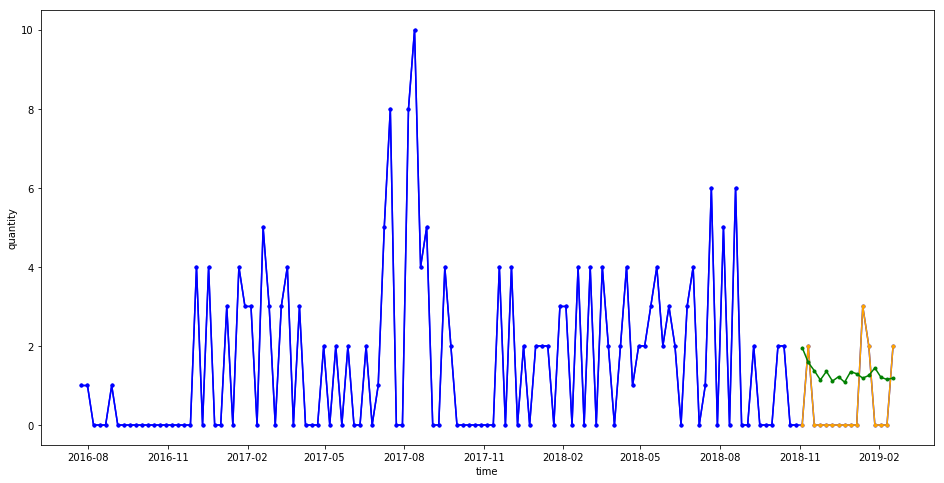

In [102]:
index = str(kunag)+"_"+str(matnr)
order = 16
test_points = 16
# df_testing_complete = pd.read_csv(r'testing.csv')
df_testing_complete = dataframe[-16:]
test_predictions = []
# print(dataframe[-5:])
for k in range(0, test_points):
    df = dataframe[:-test_points + k]
    df_training_complete = df
    print(df_training_complete.shape)
  
    df_training_processed = df_training_complete.iloc[:, 1:2].values  

    scaler = MinMaxScaler(feature_range = (0, 1))
    df_training_scaled = scaler.fit_transform(df_training_processed)  

    features_set = []  
    labels = []
#     print("df.shape :",df.shape[0])
    for i in range(order+1 , df.shape[0]):  
        features_set.append(df_training_scaled[i-order+1:i+1, 0])
        labels.append(df_training_scaled[i, 0])
    
    print("X", features_set[-1])
    print("\n")

    features_set, labels = np.array(features_set), np.array(labels)  
    features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
    print(features_set.size)
    model = Sequential()  
    model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
    model.add(Dropout(0.2))  
    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))  
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))  
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
    
    model.fit(features_set, labels, epochs = 5, batch_size = 32)  
    df_testing_processed = df_testing_complete.iloc[k:k+1, 1:2].values 

#     print("testing :", df_testing_processed)
    df_total = pd.concat((df_training_complete['quantity'], df_testing_complete['quantity']), axis=0)  
#     print("K :", k)
#     print("df_total : ", len(df_total))
#     print("df_testing_complete : ", len(df_testing_complete))
    test_inputs = df_total[len(df_total) - len(df_testing_complete) - order + k:].values  
#     print("test_inputs :", test_inputs)
    test_inputs = test_inputs.reshape(-1,1)  
    test_inputs = scaler.transform(test_inputs) 
#     print("test_inputs :", len(test_inputs))

    test_features = []   
    
    test_features.append(test_inputs[1:order+1, 0])
    
    test_features = np.array(test_features)  
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    print("Y", test_features[-1][-1][-1])
    predictions = model.predict(test_features)  
    predictions = scaler.inverse_transform(predictions)  
    test_predictions.append(predictions)
test_predictions_1 = [i[0][0] for i in test_predictions]
df_c = pd.DataFrame(data=test_predictions_1)
test.reset_index(inplace = True)
pred = pd.concat([test, df_c], axis=1, join_axes=[test.index])
pred.set_index("date",inplace = True)

pred.drop(['index', 'quantity'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)


mae = mean_absolute_error(test.quantity, pred[0])
rms = sqrt(mean_squared_error(test.quantity, pred[0]))
print("mae :",mae)
print("rms :",rms)

dataframe.set_index('date',inplace=True)
train.set_index('date',inplace=True)
test.set_index('date',inplace=True)


plt.figure(figsize=(16,8))
plt.plot( dataframe, marker='.', color='blue')
plt.plot( train, marker='.', color='blue')
plt.plot( test, marker='.', color='orange')
plt.plot(pred,marker = ".",color = 'green')
plt.xlabel("time")
plt.ylabel('quantity')
plt.savefig("/home/bharat/proj/time_series1/lstm/graphs/" + 'Graph_{}.png'.format(index), format="PNG")  

# plt.show()



In [35]:
test_predictions_1 = [i[0][0] for i in test_predictions]

In [42]:
test_predictions_1

[1.1745573,
 1.273861,
 1.4369874,
 1.1708035,
 1.2189825,
 1.2375517,
 1.2348533,
 1.2720819,
 1.2084942,
 1.2914461,
 1.1782854,
 1.3360215,
 1.1335868,
 1.2164818,
 1.2301724,
 1.1832256]

In [43]:
dataframe[-10:]

,date,quantity
125,2018-12-16,0.0
126,2018-12-23,0.0
127,2018-12-30,0.0
128,2019-01-06,0.0
129,2019-01-13,3.0
130,2019-01-20,2.0
131,2019-01-27,0.0
132,2019-02-03,0.0
133,2019-02-10,0.0
134,2019-02-17,2.0


In [44]:
# order = 16
# test_points = 16
# # df_testing_complete = pd.read_csv(r'testing.csv')
# df_testing_complete = dataframe[-16:]
# test_predictions = []
# # print(dataframe[-5:])
# for k in range(0, test_points):
#     df = dataframe[:-test_points + k]
#     df_training_complete = df
#     print(df_training_complete.shape)
  
#     df_training_processed = df_training_complete.iloc[:, 1:2].values  

#     scaler = MinMaxScaler(feature_range = (0, 1))
#     df_training_scaled = scaler.fit_transform(df_training_processed)  

#     features_set = []  
#     labels = []
# #     print("df.shape :",df.shape[0])
#     for i in range(order+1 , df.shape[0]):  
#         features_set.append(df_training_scaled[i-order+1:i+1, 0])
#         labels.append(df_training_scaled[i, 0])
    
#     print("X", features_set[-1])
#     print("\n")

#     features_set, labels = np.array(features_set), np.array(labels)  
#     features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  
#     print(features_set.size)
#     model = Sequential()  
#     model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
#     model.add(Dropout(0.2))  
#     model.add(LSTM(units=50, return_sequences=True))  
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=50, return_sequences=True))  
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=50))  
#     model.add(Dropout(0.2))
#     model.add(Dense(units = 1))  
#     model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
    
#     model.fit(features_set, labels, epochs = 5, batch_size = 32)  
#     df_testing_processed = df_testing_complete.iloc[k:k+1, 1:2].values 

# #     print("testing :", df_testing_processed)
#     df_total = pd.concat((df_training_complete['quantity'], df_testing_complete['quantity']), axis=0)  
# #     print("K :", k)
# #     print("df_total : ", len(df_total))
# #     print("df_testing_complete : ", len(df_testing_complete))
#     test_inputs = df_total[len(df_total) - len(df_testing_complete) - order + k:].values  
# #     print("test_inputs :", test_inputs)
#     test_inputs = test_inputs.reshape(-1,1)  
#     test_inputs = scaler.transform(test_inputs) 
# #     print("test_inputs :", len(test_inputs))

#     test_features = []   
    
#     test_features.append(test_inputs[1:order+1, 0])
    
#     test_features = np.array(test_features)  
#     test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
#     print("Y", test_features[-1][-1][-1])
#     predictions = model.predict(test_features)  
#     predictions = scaler.inverse_transform(predictions)  
#     test_predictions.append(predictions)


In [45]:
df_testing_complete

,date,quantity
119,2018-11-04,0.0
120,2018-11-11,2.0
121,2018-11-18,0.0
122,2018-11-25,0.0
123,2018-12-02,0.0
124,2018-12-09,0.0
125,2018-12-16,0.0
126,2018-12-23,0.0
127,2018-12-30,0.0
128,2019-01-06,0.0


In [46]:
# predictions

In [87]:
pwd

u'/home/bharat/proj/time_series1/lstm'

In [ ]:
df_c = pd.DataFrame(data=test_predictions_1)
test.reset_index(inplace = True)
pred = pd.concat([test, df_c], axis=1, join_axes=[test.index])
pred.set_index("date",inplace = True)
# del pred["index"]
# del pred["quantity"]
# del test["index"]
pred.drop(['index', 'quantity'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)


mae = mean_absolute_error(test.quantity, pred[0])
rms = sqrt(mean_squared_error(test.quantity, pred[0]))
print("mae :",mae)
print("rms :",rms)

dataframe.set_index('date',inplace=True)
train.set_index('date',inplace=True)
test.set_index('date',inplace=True)


plt.figure(figsize=(16,8))
plt.plot( dataframe, marker='.', color='blue')
plt.plot( train, marker='.', color='blue')
plt.plot( test, marker='.', color='orange')
plt.plot(pred,marker = ".",color = 'green')
plt.xlabel("time")
plt.ylabel('quantity')
plt.savefig("/home/bharat/proj/time_series1/lstm/graphs/" + 'Graph_{}.png'.format(index), format="PNG")  

# plt.show()


In [79]:
train,test=  train_test_split(df,500056565,100278,16)

In [77]:
df_c = pd.DataFrame(data=test_predictions_1)

In [78]:
df_c

,0
0,1.174557
1,1.273861
2,1.436987
3,1.170804
4,1.218982
5,1.237552
6,1.234853
7,1.272082
8,1.208494
9,1.291446


In [80]:
test.reset_index(inplace = True)
pred = pd.concat([test, df_c], axis=1, join_axes=[test.index])
pred.set_index("date",inplace = True)
# del pred["index"]
# del pred["quantity"]
# del test["index"]
pred.drop(['index', 'quantity'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)

In [81]:
pred.head()

,0
date,
2018-11-04,1.174557
2018-11-11,1.273861
2018-11-18,1.436987
2018-11-25,1.170804
2018-12-02,1.218982


In [82]:

mae = mean_absolute_error(test.quantity, pred[0])
rms = sqrt(mean_squared_error(test.quantity, pred[0]))
print("mae :",mae)
print("rms :",rms)

('mae :', 1.1784128248691559)
('rms :', 1.2076883372530798)


In [83]:
# dataframe.tail()

In [84]:
test.tail()

,date,quantity
11,2019-01-20,2.0
12,2019-01-27,0.0
13,2019-02-03,0.0
14,2019-02-10,0.0
15,2019-02-17,2.0


In [74]:
train.head()

,date,quantity
0,2016-07-24,1.0
1,2016-07-31,1.0
2,2016-08-07,0.0
3,2016-08-14,0.0
4,2016-08-21,0.0


In [85]:

dataframe.set_index('date',inplace=True)
train.set_index('date',inplace=True)
test.set_index('date',inplace=True)

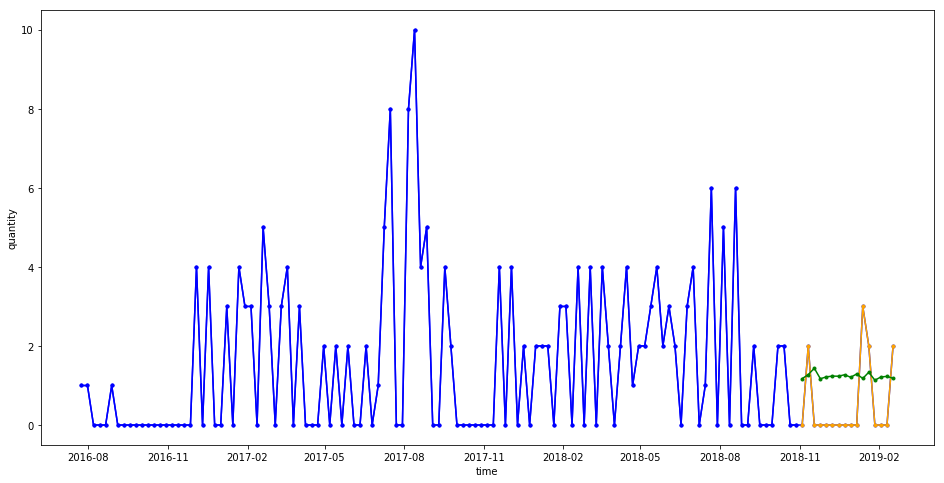

In [86]:
plt.figure(figsize=(16,8))
plt.plot( dataframe, marker='.', color='blue')
plt.plot( train, marker='.', color='blue')
plt.plot( test, marker='.', color='orange')
plt.plot(pred,marker = ".",color = 'green')
plt.xlabel("time")
plt.ylabel('quantity')
# plt.savefig("/home/rahul/Downloads/bharat/time_series1/high_freq_plots/" + 'Graph_{}.png'.format(index), format="PNG")  

plt.show()


In [ ]:
del pred["index"]
del pred["quantity"]
del test["index"]

In [ ]:
pred.drop(['index', 'quantity','index'], axis=1, inplace=True)

In [ ]:

# model = Sequential()  
# model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
# model.add(Dropout(0.2))  
# model.add(LSTM(units=50, return_sequences=True))  
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))  
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))  
# model.add(Dropout(0.2))
# model.add(Dense(units = 1))  
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# model.fit(features_set, labels, epochs = 100, batch_size = 32)  
# df_testing_complete = pd.read_csv(r'testing.csv')  
# df_testing_processed = df_testing_complete.iloc[:, 1:2].values 

In [ ]:
# df_total = pd.concat((df_training_complete['quantity'], df_testing_complete['quantity']), axis=0)  
# test_inputs = df_total[len(df_total) - len(df_testing_complete) - 16:].values  
# test_inputs = test_inputs.reshape(-1,1)  
# test_inputs = scaler.transform(test_inputs) 

# test_features = []  
# for i in range(16, 16 + 1):  
#     test_features.append(test_inputs[i-16:i, 0])
    
# test_features = np.array(test_features)  
# test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# predictions = model.predict(test_features)  
# predictions = scaler.inverse_transform(predictions)  

In [ ]:
import os
from models_all import *
import time
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

%matplotlib inline

In [ ]:
bucket = pd.read_csv("bucket.csv")
df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],"matnr" : ["matnr"],
                       "Naive" : ["-"],
                       "Average" : ["-"],
                       "Moving Average" : ["-"],
                       "SES" : ["-"],
                       "Holts Linear" : ["-"],
                       "Holts Winter" : ["-"],
                       "Arima" : ["-"],
                       "prophet" :["-"],
                       "croston tsb" : ["-"]}))


n = 16               #number of points to predict
window = 30         #MOVING AVERAGE FORECAST
sc = 0.2             #SES-SIMPLE EXPONENTIAL SMOOTHING
sl = 0.3
ss = 0.1   #HOLTS LINEAR (sl =smoothong level, ss = smoothing slope)
sp = 4               #HOLTS WINTERS (sp = seasonal period)
p,d,q = 0,1,2        #SARIMA
sps = 0.2            #PROPHET (sps = seasonality prior scale)
alpha,beta = 0.2,0.2 #CROSTON TSB


cnt = 0
for i in range (1,500):
            kunag = int(bucket["kunag"].iloc[i])
            matnr = int(bucket["matnr"].iloc[i])
            print("count",cnt)
            print("index : ",kunag,",",matnr)
#             output1,rms1,mae1 = naive(df,kunag,matnr,n)
#             output2,rms2,mae2 = average_forecast(df,kunag,matnr,n)
#             output3,rms3,mae3 = moving_average(df,kunag,matnr,n,window)
#             output4,rms4,mae4 = ses(df,kunag,matnr,n,sc)
#             output5,rms5,mae5 = holts_linear(df,kunag,matnr,n,sl,ss)
#             output6,rms6,mae6 = holts_winter(df,kunag,matnr,n,sp)
            output7,rms7,mae7 = sarima(df,kunag,matnr,n,p,d,q)
#             output8,rms8,mae8 = prophet(df, kunag,matnr,n,sps)
#             output9,rms9,mae9 = croston_tsb(df,kunag,matnr,n,alpha,beta)
            result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],"matnr" : [matnr],
                   "Arima" : [round(rms7,3)]}))
            



            result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],"matnr" : [matnr],
                   "Naive" : [round(rms1,3)],
                   "Average" : [round(rms2,3)],
                   "Moving Average" : [round(rms3,3)],
                   "SES" : [round(rms4,3)],
                   "Holts Linear" : [round(rms5,3)],
                   "Holts Winter" : [round(rms6,3)],
                   "Arima" : [round(rms7,3)],
                   "prophet" :[round(rms8,3)],
                   "croston tsb" : [round(rms9,3)]}))
            
            print(result_df)
            main_df = main_df.append(result_df, ignore_index = True) 
            cnt+=1
print(main_df)

In [ ]:
export_csv= main_df.to_csv (r'results/arima012(500).csv',sep = ",", index = None, header=True)

In [ ]:
data = pd.read_csv("results/arima012(500).csv",sep = ",", header = None)

In [ ]:
data = data.convert_objects(convert_numeric=True)
round(data.sum(axis = 0, skipna = True),3)